In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/cleaned_v2_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            3636 non-null   int64  
 1   Brand                            3636 non-null   object 
 2   Movement                         3629 non-null   object 
 3   Case Size                        3636 non-null   float64
 4   Case Thickness                   2505 non-null   float64
 5   Case Shape                       3636 non-null   object 
 6   Case Material                    3636 non-null   object 
 7   Glass Material                   3636 non-null   object 
 8   Hands                            1754 non-null   object 
 9   Indexes                          1720 non-null   object 
 10  Strap Material                   3636 non-null   object 
 11  Clasp Type                       3636 non-null   object 
 12  Gender              

In [4]:
df.isnull().sum()

price                                 0
Brand                                 0
Movement                              7
Case Size                             0
Case Thickness                     1131
Case Shape                            0
Case Material                         0
Glass Material                        0
Hands                              1882
Indexes                            1916
Strap Material                        0
Clasp Type                            0
Gender                                0
Water Resistance (M)                  5
Warranty Period                       0
Country of Origin                     0
Display                            1033
Power Reserve                      1313
Jewels                                0
Interchangeable Strap                 0
Bezel                                 0
Limited Edition                       0
Frequency (bph)                    1612
Case Material Coating              3041
feature_Day-Night Indicator           0


As Case thickness and Power Reserve are related with other columns, we can impute them by training a model with those column as target.

### Case Thickness

<Axes: xlabel='Case Thickness', ylabel='Density'>

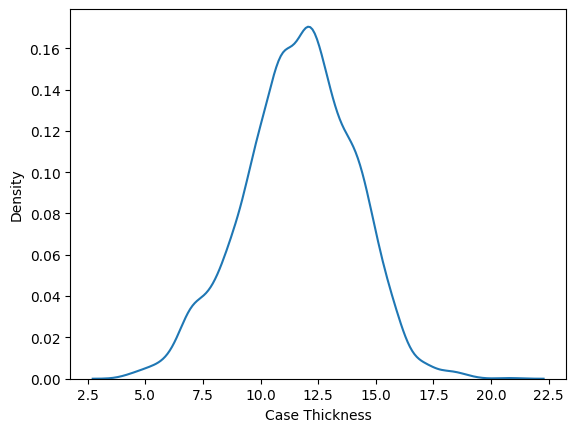

In [5]:
sns.kdeplot(df['Case Thickness'])

In [6]:
train_data = df[df['Case Thickness'].notnull()]
test_data = df[df['Case Thickness'].isnull()]

non_nan_columns = train_data.columns[train_data.notna().all()].tolist()

numerical_features = train_data[non_nan_columns].select_dtypes(include=['float', 'int']).drop(columns=['price', 'Case Thickness'], errors='ignore').columns.tolist()
categorical_features = train_data[non_nan_columns].select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown='ignore')
encoded_train = encoder.fit_transform(train_data[categorical_features])
encoded_test = encoder.transform(test_data[categorical_features])

X_train = pd.concat([
    train_data[numerical_features].reset_index(drop=True),
    pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_features))
], axis=1)

X_test = pd.concat([
    test_data[numerical_features].reset_index(drop=True),
    pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_features))
], axis=1)

y_train = train_data['Case Thickness']

X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42, n_estimators=500)
model.fit(X_train_split, y_train_split)

print("Validation R^2:", model.score(X_valid_split, y_valid_split))

test_data['Case Thickness'] = model.predict(X_test)

final_data = pd.concat([train_data, test_data]).sort_index()

Validation R^2: 0.8416086441479027


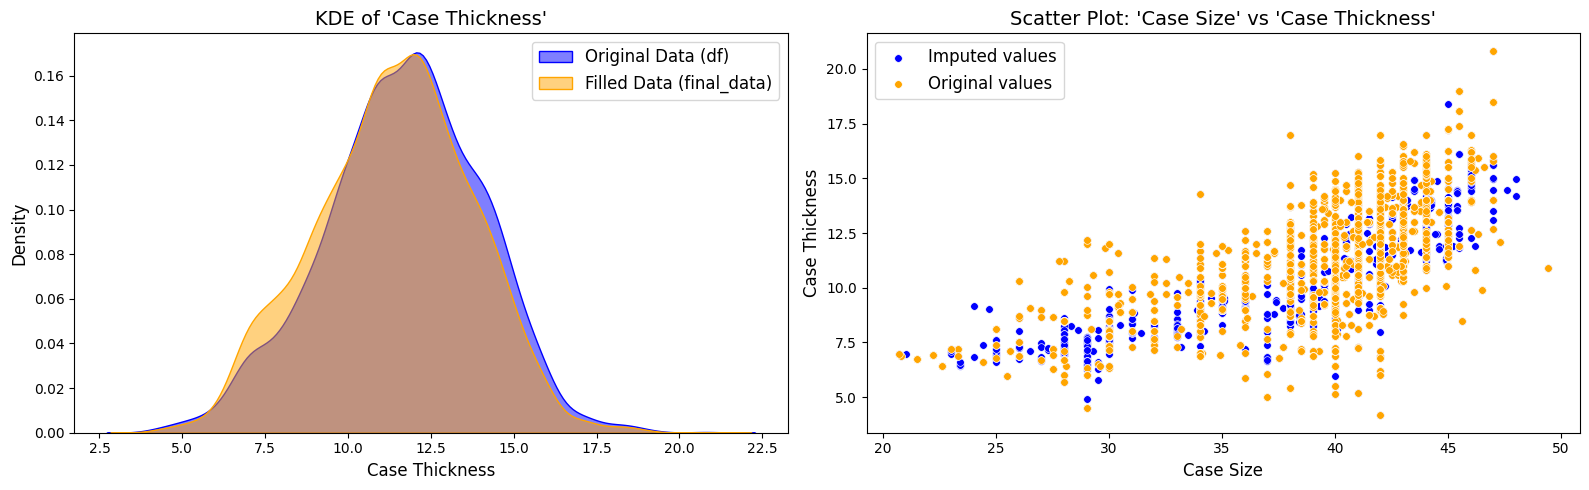

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.kdeplot(
    df['Case Thickness'],
    label="Original Data (df)",
    color="blue",
    fill=True,
    alpha=0.5,
    ax=axes[0]
)
sns.kdeplot(
    final_data['Case Thickness'],
    label="Filled Data (final_data)",
    color="orange",
    fill=True,
    alpha=0.5,
    ax=axes[0]
)
axes[0].set_title("KDE of 'Case Thickness'", fontsize=14)
axes[0].set_xlabel("Case Thickness", fontsize=12)
axes[0].set_ylabel("Density", fontsize=12)
axes[0].legend(fontsize=12)

sns.scatterplot(
    data=final_data,
    x='Case Size',
    y='Case Thickness',
    s=30,
    color="blue",
    label="Imputed values",
    ax=axes[1]
)
sns.scatterplot(
    data=df,
    x='Case Size',
    y='Case Thickness',
    s=30,
    color="orange",
    label="Original values",
    ax=axes[1]
)
axes[1].set_title("Scatter Plot: 'Case Size' vs 'Case Thickness'", fontsize=14)
axes[1].set_xlabel("Case Size", fontsize=12)
axes[1].set_ylabel("Case Thickness", fontsize=12)
axes[1].legend(fontsize=12)

plt.tight_layout()
plt.show()


In [8]:
df['Case Thickness'].mean()

11.6591876247505

In [9]:
final_data['Case Thickness'].mean()

11.369616427190065

In [10]:
df = final_data

### Power Reserve

<Axes: xlabel='Power Reserve', ylabel='Density'>

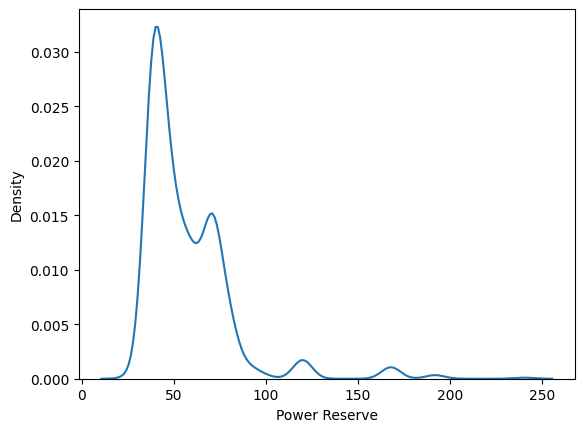

In [11]:
sns.kdeplot(df['Power Reserve'])

In [12]:
train_data = df[df['Power Reserve'].notnull()]
test_data = df[df['Power Reserve'].isnull()]

non_nan_columns = train_data.columns[train_data.notna().all()].tolist()

numerical_features = train_data[non_nan_columns].select_dtypes(include=['float', 'int']).drop(columns=['price', 'Power Reserve'], errors='ignore').columns.tolist()
categorical_features = train_data[non_nan_columns].select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown='ignore')
encoded_train = encoder.fit_transform(train_data[categorical_features])
encoded_test = encoder.transform(test_data[categorical_features])

X_train = pd.concat([
    train_data[numerical_features].reset_index(drop=True),
    pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_features))
], axis=1)

X_test = pd.concat([
    test_data[numerical_features].reset_index(drop=True),
    pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_features))
], axis=1)

y_train = train_data['Power Reserve']

X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42, n_estimators=500)
model.fit(X_train_split, y_train_split)

print("Validation R^2:", model.score(X_valid_split, y_valid_split))

test_data['Power Reserve'] = model.predict(X_test)

final_data = pd.concat([train_data, test_data]).sort_index()

Validation R^2: 0.7426264016449463


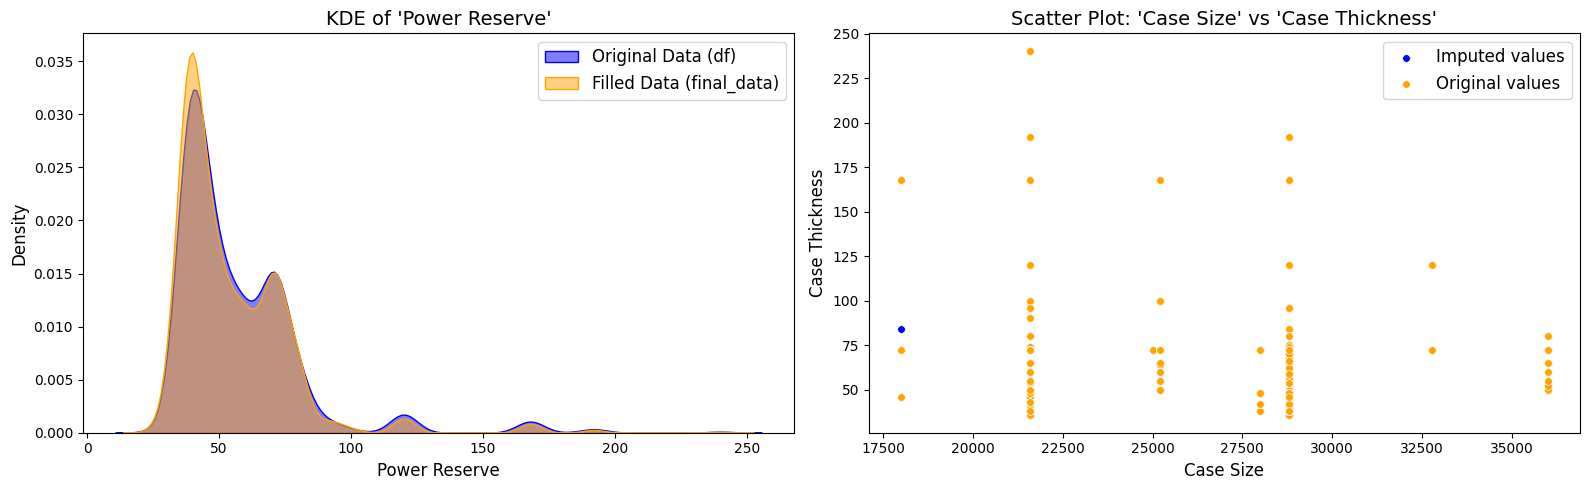

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.kdeplot(
    df['Power Reserve'],
    label="Original Data (df)",
    color="blue",
    fill=True,
    alpha=0.5,
    ax=axes[0]
)
sns.kdeplot(
    final_data['Power Reserve'],
    label="Filled Data (final_data)",
    color="orange",
    fill=True,
    alpha=0.5,
    ax=axes[0]
)
axes[0].set_title("KDE of 'Power Reserve'", fontsize=14)
axes[0].set_xlabel('Power Reserve', fontsize=12)
axes[0].set_ylabel("Density", fontsize=12)
axes[0].legend(fontsize=12)

sns.scatterplot(
    data=final_data,
    x='Frequency (bph)',
    y='Power Reserve',
    s=30,
    color="blue",
    label="Imputed values",
    ax=axes[1]
)
sns.scatterplot(
    data=df,
    x='Frequency (bph)',
    y='Power Reserve',
    s=30,
    color="orange",
    label="Original values",
    ax=axes[1]
)
axes[1].set_title("Scatter Plot: 'Case Size' vs 'Case Thickness'", fontsize=14)
axes[1].set_xlabel("Case Size", fontsize=12)
axes[1].set_ylabel("Case Thickness", fontsize=12)
axes[1].legend(fontsize=12)

plt.tight_layout()
plt.show()

In [14]:
df['Power Reserve'].median()

48.0

In [15]:
final_data['Power Reserve'].median()

48.0

In [16]:
df['Power Reserve'].mean()

56.89556607834696

In [17]:
final_data['Power Reserve'].mean()

54.56595858216775

In [18]:
df = final_data

In [19]:
temp = df.copy()

In [20]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=1)

imputed_data = knn_imputer.fit_transform(temp[['Power Reserve', 'Frequency (bph)']])

imputed_df = pd.DataFrame(imputed_data, columns=['Power Reserve', 'Frequency (bph)'])

temp[['Power Reserve', 'Frequency (bph)']] = imputed_df

In [21]:
df = temp

### Movement

In [22]:
df[df['Movement'].isnull()]

,price,Brand,Movement,Case Size,Case Thickness,Case Shape,Case Material,Glass Material,Hands,Indexes,...,luminosity_on_Bezel,luminosity_on_Dial,precious_stone_on_Case,precious_stone_on_Dial,precious_stone_on_Bracelet,precious_stone_on_Crown,precious_stone_on_Clasp,precious_stone_on_Bezel,precious_stone_on_Lugs,precious_stone_on_Buckle
1656,4800000,Jacob & Co.,NaN,38.0,10.750000,Round,Gold,Sapphire Crystal,NaN,NaN,...,0,0,0,1,0,0,0,1,0,0
1665,4800000,Jacob & Co.,NaN,38.0,10.660180,Round,Gold,Sapphire Crystal,NaN,NaN,...,0,0,0,1,0,0,0,1,0,0
3281,4800000,Jacob & Co.,NaN,38.0,10.750000,Round,Gold,Sapphire Crystal,Leaf,Diamond,...,0,0,0,1,0,0,0,1,0,0
3283,2500000,Jacob & Co.,NaN,38.0,10.646887,Round,Steel,Sapphire Crystal,Leaf,Diamond,...,0,0,0,1,0,0,0,1,0,0
3310,2500000,Jacob & Co.,NaN,38.0,10.750000,Round,Steel,Sapphire Crystal,Leaf,Diamond,...,0,0,0,1,0,0,0,1,0,0
3406,6100000,Jacob & Co.,NaN,38.0,10.750000,Round,Gold,Sapphire Crystal,Leaf,NaN,...,0,0,1,1,0,0,0,0,0,1
3439,2500000,Jacob & Co.,NaN,38.0,10.750000,Round,Steel,Sapphire Crystal,Leaf,NaN,...,0,0,0,1,0,0,0,1,0,0


In [23]:
df[(df['Brand'] == 'Jacob & Co.') & (df['Case Thickness'] < 11) & (df['Case Thickness'] > 10)]

,price,Brand,Movement,Case Size,Case Thickness,Case Shape,Case Material,Glass Material,Hands,Indexes,...,luminosity_on_Bezel,luminosity_on_Dial,precious_stone_on_Case,precious_stone_on_Dial,precious_stone_on_Bracelet,precious_stone_on_Crown,precious_stone_on_Clasp,precious_stone_on_Bezel,precious_stone_on_Lugs,precious_stone_on_Buckle
1655,2500000,Jacob & Co.,Quartz,38.0,10.750000,Round,Steel,Sapphire Crystal,NaN,NaN,...,0,0,0,1,0,0,0,1,0,0
1656,4800000,Jacob & Co.,NaN,38.0,10.750000,Round,Gold,Sapphire Crystal,NaN,NaN,...,0,0,0,1,0,0,0,1,0,0
1665,4800000,Jacob & Co.,NaN,38.0,10.660180,Round,Gold,Sapphire Crystal,NaN,NaN,...,0,0,0,1,0,0,0,1,0,0
2771,4800000,Jacob & Co.,Quartz,38.0,10.750000,Round,Gold,Sapphire Crystal,Leaf,Diamond,...,0,0,0,1,0,1,0,1,0,0
3227,800000,Jacob & Co.,Quartz,40.0,10.540627,Round,Steel,Sapphire Crystal,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3281,4800000,Jacob & Co.,NaN,38.0,10.750000,Round,Gold,Sapphire Crystal,Leaf,Diamond,...,0,0,0,1,0,0,0,1,0,0
3283,2500000,Jacob & Co.,NaN,38.0,10.646887,Round,Steel,Sapphire Crystal,Leaf,Diamond,...,0,0,0,1,0,0,0,1,0,0
3310,2500000,Jacob & Co.,NaN,38.0,10.750000,Round,Steel,Sapphire Crystal,Leaf,Diamond,...,0,0,0,1,0,0,0,1,0,0
3406,6100000,Jacob & Co.,NaN,38.0,10.750000,Round,Gold,Sapphire Crystal,Leaf,NaN,...,0,0,1,1,0,0,0,0,0,1
3439,2500000,Jacob & Co.,NaN,38.0,10.750000,Round,Steel,Sapphire Crystal,Leaf,NaN,...,0,0,0,1,0,0,0,1,0,0


In [24]:
df.loc[df['Movement'].isnull(), 'Movement'] = 'Quartz'

### Water Resistance

In [25]:
df.loc[df['Water Resistance (M)'].isna()].iloc[:, :20]

,price,Brand,Movement,Case Size,Case Thickness,Case Shape,Case Material,Glass Material,Hands,Indexes,Strap Material,Clasp Type,Gender,Water Resistance (M),Warranty Period,Country of Origin,Display,Power Reserve,Jewels,Interchangeable Strap
446,4547000,BVLGARI,Quartz,35.0,8.976997,Oval,Gold,Sapphire Crystal,NaN,NaN,Gold,Others,Women,NaN,5.0,Switzerland,NaN,28.80232,0.0,0
609,1446000,BVLGARI,Quartz,35.0,9.101637,Oval,Steel,Sapphire Crystal,NaN,NaN,G-S Hybrid,Others,Women,NaN,5.0,Switzerland,NaN,28.65688,0.0,0
610,1200000,BVLGARI,Quartz,35.0,9.141543,Oval,Steel,Sapphire Crystal,NaN,NaN,Steel,Others,Women,NaN,5.0,Switzerland,NaN,29.12496,0.0,0
721,7200000,H. Moser & Cie.,Automatic,40.0,10.700000,Round,Gold,Sapphire Crystal,Leaf,NaN,Leather,Folding,Men,NaN,2.0,Switzerland,Analog,72.00000,28.0,0
1093,55000,Seiko,Automatic,41.8,11.890058,Round,Steel,Sapphire Crystal,NaN,NaN,Leather,Folding,Men,NaN,2.0,Japan,Analog,41.00000,0.0,0


In [26]:
df[(df['Brand'] == 'BVLGARI') & (df['Movement'] == 'Quartz')].iloc[:, :20]

,price,Brand,Movement,Case Size,Case Thickness,Case Shape,Case Material,Glass Material,Hands,Indexes,Strap Material,Clasp Type,Gender,Water Resistance (M),Warranty Period,Country of Origin,Display,Power Reserve,Jewels,Interchangeable Strap
7,640000,BVLGARI,Quartz,33.0,8.263290,Round,G-S Hybrid,Sapphire Crystal,NaN,NaN,Steel,Folding,Women,30.0,5.0,Switzerland,NaN,33.68488,0.0,0
199,955000,BVLGARI,Quartz,35.0,9.001893,Drop,Steel,Sapphire Crystal,Sword,Roman Numerals,Steel,Others,Women,30.0,5.0,Switzerland,NaN,29.13904,0.0,0
336,1446000,BVLGARI,Quartz,35.0,9.053973,Oval,G-S Hybrid,Sapphire Crystal,Sword,Mixed,G-S Hybrid,Others,Women,30.0,5.0,Switzerland,NaN,26.28000,0.0,0
348,1454000,BVLGARI,Quartz,35.0,8.842137,Drop,Gold,Sapphire Crystal,NaN,NaN,Gold,Others,Women,30.0,5.0,Switzerland,NaN,29.06416,0.0,0
357,605000,BVLGARI,Quartz,35.0,8.953453,Drop,Steel,Sapphire Crystal,Sword,Mixed,Steel,Others,Women,30.0,5.0,Switzerland,Analog,26.28000,0.0,0
358,1034000,BVLGARI,Quartz,35.0,9.016513,Oval,G-S Hybrid,Sapphire Crystal,Sword,Mixed,G-S Hybrid,Others,Women,30.0,5.0,Switzerland,Analog,26.28000,0.0,0
386,1927000,BVLGARI,Quartz,35.0,9.053973,Oval,G-S Hybrid,Sapphire Crystal,NaN,NaN,G-S Hybrid,Others,Women,30.0,5.0,Switzerland,NaN,28.76224,0.0,0
387,1446000,BVLGARI,Quartz,35.0,9.053973,Oval,G-S Hybrid,Sapphire Crystal,NaN,NaN,G-S Hybrid,Others,Women,30.0,5.0,Switzerland,NaN,28.76224,0.0,0
446,4547000,BVLGARI,Quartz,35.0,8.976997,Oval,Gold,Sapphire Crystal,NaN,NaN,Gold,Others,Women,NaN,5.0,Switzerland,NaN,28.80232,0.0,0
526,1927000,BVLGARI,Quartz,35.0,9.101637,Oval,Steel,Sapphire Crystal,NaN,NaN,G-S Hybrid,Others,Women,30.0,5.0,Switzerland,NaN,28.65688,0.0,0


In [27]:
df.loc[df['Water Resistance (M)'].isna(), 'Water Resistance (M)'] = 30.0

In [28]:
# Case Material Coating

df['Case Material Coating'] = df['Case Material Coating'].fillna('No coating')

In [29]:
df = df.drop(columns=['Hands', 'Indexes', 'Display']) # Majority values missing

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3636 entries, 0 to 3635
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            3636 non-null   int64  
 1   Brand                            3636 non-null   object 
 2   Movement                         3636 non-null   object 
 3   Case Size                        3636 non-null   float64
 4   Case Thickness                   3636 non-null   float64
 5   Case Shape                       3636 non-null   object 
 6   Case Material                    3636 non-null   object 
 7   Glass Material                   3636 non-null   object 
 8   Strap Material                   3636 non-null   object 
 9   Clasp Type                       3636 non-null   object 
 10  Gender                           3636 non-null   object 
 11  Water Resistance (M)             3636 non-null   float64
 12  Warranty Period          

In [32]:
df.to_csv("data/cleaned_v3_data.csv", index=False)